In [4]:
import urllib.request
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

IMAGES_PATH = Path() / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
filename = "ladybug.png"

filepath = IMAGES_PATH / filename
if not filepath.is_file():
    print("Downloading", filename)
    url = f"{homl3_root}/images/unsupervised_learning/{filename}"
    urllib.request.urlretrieve(url, filepath)

In [6]:
image = plt.imread(filepath)
image.shape

(533, 800, 3)

In [35]:
from sklearn.cluster import KMeans

X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=2, n_init=10, random_state=42).fit(X)

In [36]:
kmeans.cluster_centers_

array([[0.13408194, 0.2659212 , 0.04021322],
       [0.8627244 , 0.80178463, 0.10434178]], dtype=float32)

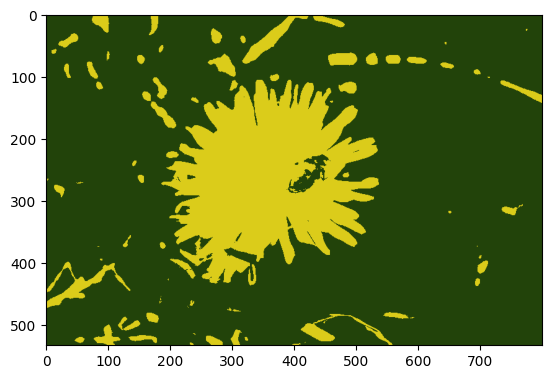

In [37]:
segmented_image = kmeans.cluster_centers_[kmeans.labels_]
segmented_image = segmented_image.reshape(image.shape)
plt.imshow(segmented_image)